## Homework 3
### Programming Assignment 1
### 111 Computational Physics Lab  
  >Author: Yuan-Yen Peng 108000204  
  >Email: garyphys0915@gapp.nthu.edu.com  
  >Date: Nov. 11, 2022  
  >LINCENCE: MIT

In [4]:
import numpy as np
import glob
from numba import jit, njit, prange, set_num_threads
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from nbody.particles import Particles
from nbody.simulation import NbodySimulation

In [5]:
problem_name = "NormalCloud"
Num = int(1e3)
tmax = 10
dt = 0.01
r_soft = 0.01

In [6]:
set_num_threads(8)
@njit(parallel = True)
def generator(N, positions, velocities, accelerations):
        mu, sigma = 0, 1 # mean = 0; variance = 1, i.e., standard deviation = sqrt(var) = 1
        for i in prange(N):
            positions[i] = np.random.normal(mu, sigma, 3)
            velocities[i] = np.random.normal(mu, sigma, 3)
            accelerations[i] = np.random.normal(mu, sigma, 3)
            
        return [positions, velocities, accelerations]

In [7]:
def initialRandomParticles(N):
        """
        Initial particles

        """
        total_mass = 20
        particles = Particles(N = N)
        
        positions = particles.get_positions()
        velocities = particles.get_velocities()
        accelerations = particles.get_accelerations()
        masses = particles.get_masses() # ones array (size = N)
        mass = total_mass / particles.nparticles # single particel's mass
        
        particles.set_masses((masses * mass))
        particles.set_positions(generator(N, positions, velocities, accelerations)[0])
        particles.set_velocities(generator(N, positions, velocities, accelerations)[1])
        particles.set_accelerations(generator(N, positions, velocities, accelerations)[2])

        return particles

solve with t = 0 ~ 10 with dt = 0.01 and r_soft = 0.01.

In [8]:
# Initial particles here.
particles = initialRandomParticles(N = Num)
# Run the n-body simulations
sim = NbodySimulation(particles)
sim.setup(G=1,method="RK4",io_freq=200,io_title=problem_name,io_screen=True,visualized=False)
sim.evolve(dt=dt,tmax=tmax)

KeyboardInterrupt: 

### Visualization

check data (with initial conditions)

In [ ]:
# initial plot check
# pos = initialRandomParticles(N = Num).get_positions()
# plt.scatter(pos[:, 0], pos[:, 1], s = 10, alpha = .7)

load data

In [ ]:
fns = "data_"+problem_name+"/"+"data_"+problem_name+"_[0-9][0-9][0-9][0-9][0-9].txt"
fns = glob.glob(fns)
fns.sort()

save to a movie

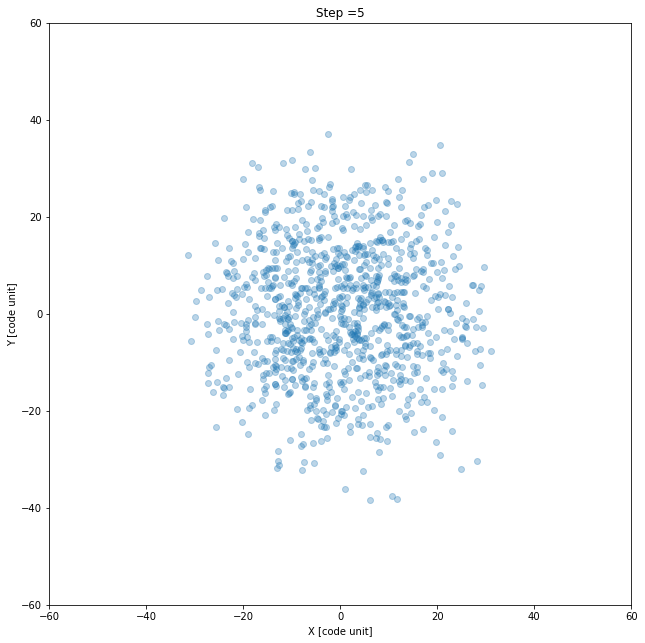

In [ ]:
scale = 60

fig, ax =plt.subplots()
fig.set_size_inches(10.5, 10.5, forward=True)
fig.set_dpi(72)
line, = ax.plot([],[],'o', alpha = .3)

def init():
    ax.set_xlim(-1*scale,1*scale)
    ax.set_ylim(-1*scale,1*scale)
    ax.set_aspect('equal')
    ax.set_xlabel('X [code unit]')
    ax.set_ylabel('Y [code unit]')
    return line,

def updateParticles(frame):
    fn = fns[frame]
    m,t,x,y,z,vx,vy,vz,ax,ay,az = np.loadtxt(fn)
    #print("loadtxt done",fn)
    line.set_data(x,y)
    plt.title("Step ="+str(frame))
    return line,

ani = animation.FuncAnimation(fig, updateParticles, frames=len(fns),init_func=init, blit=True)
ani.save('movie_'+problem_name+'.mp4',fps=10)

### Performance


In [ ]:
# %timeit sim.evolve(dt=dt,tmax=tmax)